### Uber Pickups Analysis Quiz


#### Uber trip data from 2014

There are six files of raw data on Uber pickups in New York City from April to September 2014. The files are separated by month and each has the following columns:
* **Date/Time** : The date and time of the Uber pickup
* **Lat** : The latitude of the Uber pickup
* **Lon** : The longitude of the Uber pickup
* **Base** : The TLC (Taxi & Limousine Commission) base company code affiliated with the Uber pickup

These files are named:
`uber-raw-data-aug14.csv`.
* **Dispatching_base_num** : The TLC base company code of the base that dispatched the Uber
* **Pickup_date** : The date and time of the Uber pickup
* **Affiliated_base_num** : The TLC base company code affiliated with the Uber pickup
* **locationID** : The pickup location ID affiliated with the Uber pickup

The `base` codes are for the following Uber bases (In the parentheses, we have code names in German which are used internally by Uber to categorize and manage their various service offerings.) :

* **B02512 (Unter):** This corresponds to the Uber service category "UberX", which is the basic and most common service offering.
* **B02598 (Hinter):** This corresponds to the Uber service category "UberPOOL", which allows riders heading in the same direction to share a ride and split the cost.
* **B02617 (Weiter):** This corresponds to the Uber service category "UberXL", which offers larger vehicles such as SUVs and minivans for accommodating more passengers.
* **B02682 (Schmecken):** This corresponds to the Uber service category "UberSELECT", which provides premium rides with high-end vehicles.
* **B02764 (Danach-NY):** This corresponds to the Uber service category "UberWAV", which offers wheelchair-accessible vehicles for riders with accessibility needs.
* **B02765 (Grun):** This corresponds to the Uber service category "UberBLACK", which provides luxury black car services with professional drivers.
* **B02835 (Dreist):** This corresponds to the Uber service category "UberSUV", which offers larger luxury vehicles for accommodating more passengers.
* **B02836 (Drinnen):** This corresponds to the Uber service category "UberLUX", which provides high-end luxury vehicles for a premium ride experience.


#### Keeping the dataset ready before questions

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib
matplotlib.rcParams.update({'font.size': 12})

In [3]:
df = pd.read_csv('uber-raw-data-aug14.csv')
df.head()

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829275 entries, 0 to 829274
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  829275 non-null  object 
 1   Lat        829275 non-null  float64
 2   Lon        829275 non-null  float64
 3   Base       829275 non-null  object 
dtypes: float64(2), object(2)
memory usage: 25.3+ MB


#### Q1. On what date did we see the most number of Uber pickups?

**Skill Test:** Grouping & Counting

In [5]:
df.columns

Index(['Date/Time', 'Lat', 'Lon', 'Base'], dtype='object')

In [6]:
from datetime import datetime

df['Date/Time'] = pd.to_datetime(df['Date/Time'], format="%m/%d/%Y %H:%M:%S")
print(df)

                 Date/Time      Lat      Lon    Base
0      2014-08-01 00:03:00  40.7366 -73.9906  B02512
1      2014-08-01 00:09:00  40.7260 -73.9918  B02512
2      2014-08-01 00:12:00  40.7209 -74.0507  B02512
3      2014-08-01 00:12:00  40.7387 -73.9856  B02512
4      2014-08-01 00:12:00  40.7323 -74.0077  B02512
...                    ...      ...      ...     ...
829270 2014-08-31 23:55:00  40.7552 -73.9753  B02764
829271 2014-08-31 23:55:00  40.7552 -73.9753  B02764
829272 2014-08-31 23:55:00  40.7617 -73.9788  B02764
829273 2014-08-31 23:59:00  40.7395 -73.9889  B02764
829274 2014-08-31 23:59:00  40.7270 -73.9802  B02764

[829275 rows x 4 columns]


In [7]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format="%m/%d/%Y %H:%M:%S")
print(df['Date/Time'])

0        2014-08-01 00:03:00
1        2014-08-01 00:09:00
2        2014-08-01 00:12:00
3        2014-08-01 00:12:00
4        2014-08-01 00:12:00
                 ...        
829270   2014-08-31 23:55:00
829271   2014-08-31 23:55:00
829272   2014-08-31 23:55:00
829273   2014-08-31 23:59:00
829274   2014-08-31 23:59:00
Name: Date/Time, Length: 829275, dtype: datetime64[ns]


In [8]:
# Convert the 'Date/Time' column to datetime format 
df['Date/Time'] = pd.to_datetime (df['Date/Time'])

In [9]:
# Group by date and count the number of pickups
count_per_date = df.groupby(df['Date/Time'].dt.date)['Date/Time'].count()

In [10]:
# Find the date with the highest number of pickups
date_with_highest_pickups = count_per_date.idxmax()

print(date_with_highest_pickups)


2014-08-07


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829275 entries, 0 to 829274
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date/Time  829275 non-null  datetime64[ns]
 1   Lat        829275 non-null  float64       
 2   Lon        829275 non-null  float64       
 3   Base       829275 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 25.3+ MB


#### Q.2 How many Uber pickups were made on the date with the highest number of pickups?

**Skill Test:** Indexing and filtering

In [12]:
# Filter the DataFrame to include only the rows for the date with the highest number of pickups
count_per_date = df.groupby(df['Date/Time'].dt.date).size()
date_with_highest_pickups = count_per_date.idxmax()
filtered_df = df[df['Date/Time'].dt.date == date_with_highest_pickups]

In [13]:
# Get the count of pickups on the highest date
count_of_pickups = filtered_df.shape[0]
print(count_of_pickups)


32759


#### Q.3 How many unique TLC base companies are affiliated with the Uber pickups in the dataset?

**Skill Test:** Counting unique values

In [14]:
# Count the number of unique TLC base companies

num_uq_companies = df['Base'].nunique()

print(num_uq_companies)

5


#### Q.4 Which TLC base company had the highest number of pickups?

**Skill Test:** Grouping, counting, and finding the maximum

In [15]:
# Group by TLC base company and count the number of pickups

pickup_counts = df.groupby('Base')['Date/Time'].count()

In [16]:
# Find the TLC base company with the highest number of pickups

top_company = pickup_counts.idxmax()
print(top_company)


B02617


#### Q.5 How many Uber pickups were made at each unique TLC base company?

**Skill Test:** Grouping and counting

In [17]:
# Group by TLC base company and count the number of pickups

sorted_pickup_counts = pickup_counts.sort_values(ascending=False)
top_companies = sorted_pickup_counts.head()
print(top_companies)


Base
B02617    355803
B02598    220129
B02682    173280
B02764     48591
B02512     31472
Name: Date/Time, dtype: int64


#### Q.6 Can you determine the busiest time of day for Uber pickups based on the date/time column?

**Skill Test:** Extracting time components, grouping, counting, and finding the maximum

In [18]:
# Extract the hour from the 'Date/Time' column

df['Hour'] = df['Date/Time'].dt.hour

In [19]:
# Group by hour and count the number of pickups

pickup_counts_by_hour = df.groupby('Hour').size()

In [20]:
# Find the hour with the highest number of pickups

hour_with_highest_pickups = pickup_counts_by_hour.idxmax()
print(hour_with_highest_pickups)



17


#### Q.7 Can you create a visualization (e.g., a bar chart or line plot) to represent the number of Uber pickups over time?

**Skill Test:** Data Visualization using Plotting function 

In [21]:
# Group by date and count the number of pickups

pickup_counts_by_date = df.groupby(df['Date/Time'].dt.date).size()


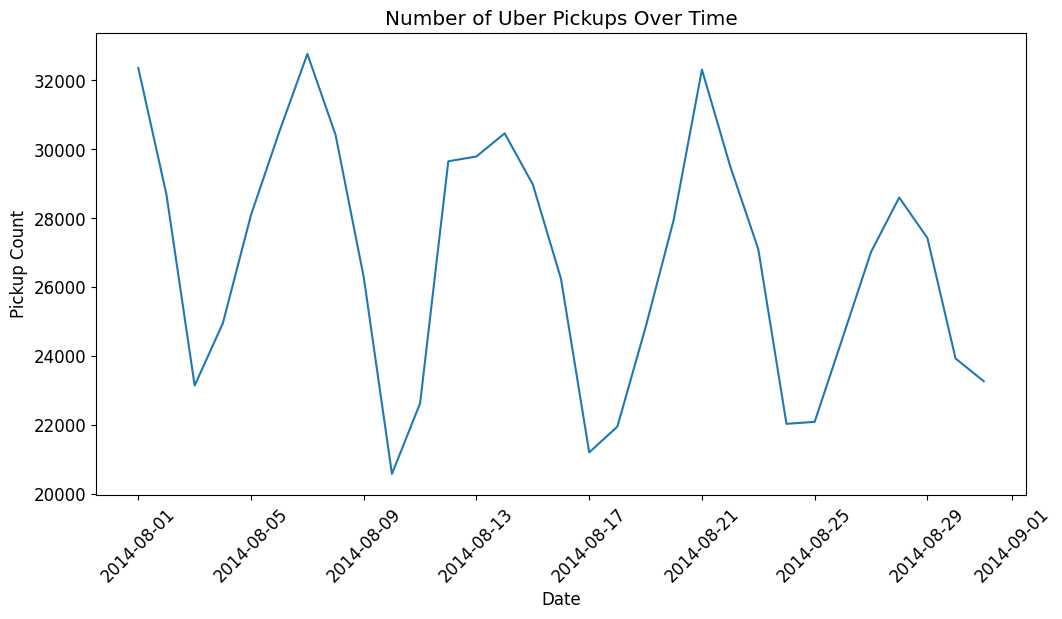

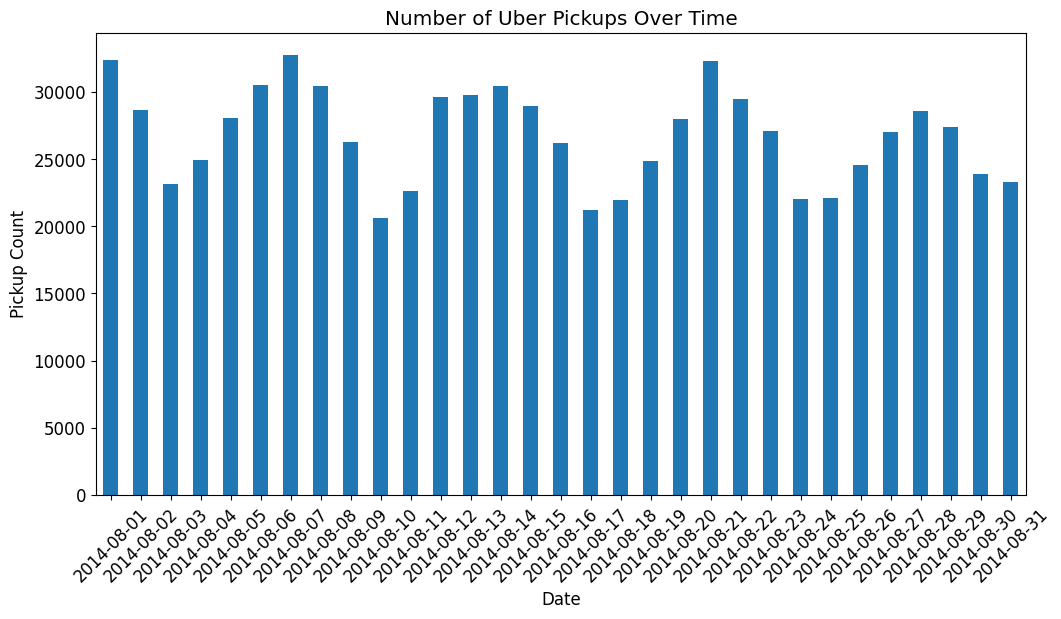

In [22]:
# Create a line plot to visualize the number of pickups over time
plt.figure(figsize=(12, 6))
pickup_counts_by_date.plot()
plt.title('Number of Uber Pickups Over Time')
plt.xlabel('Date')
plt.ylabel('Pickup Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
pickup_counts_by_date.plot(kind='bar')
plt.title('Number of Uber Pickups Over Time')
plt.xlabel('Date')
plt.ylabel('Pickup Count')
plt.xticks(rotation=45)
plt.show()

#### Q8. Can you create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude?

**Skill Test:** Scatter Plot

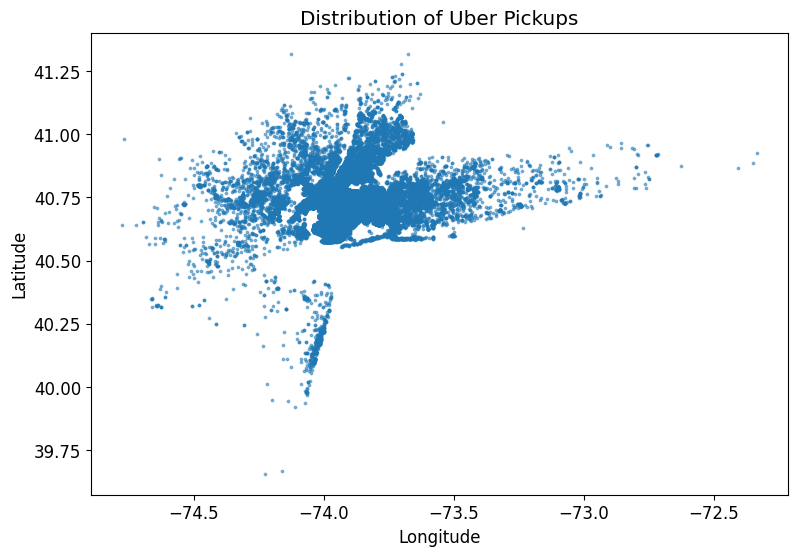

In [23]:
# Create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude
plt.figure(figsize=(9, 6))
plt.scatter(df['Lon'], df['Lat'], s= 3, alpha= 0.5)
plt.title('Distribution of Uber Pickups')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

###### Q9. Can you create a bar chart to compare the number of Uber pickups for each TLC base company?

**Skill Test:** Bar Chart

Base
B02617    355803
B02598    220129
B02682    173280
B02764     48591
B02512     31472
Name: Date/Time, dtype: int64


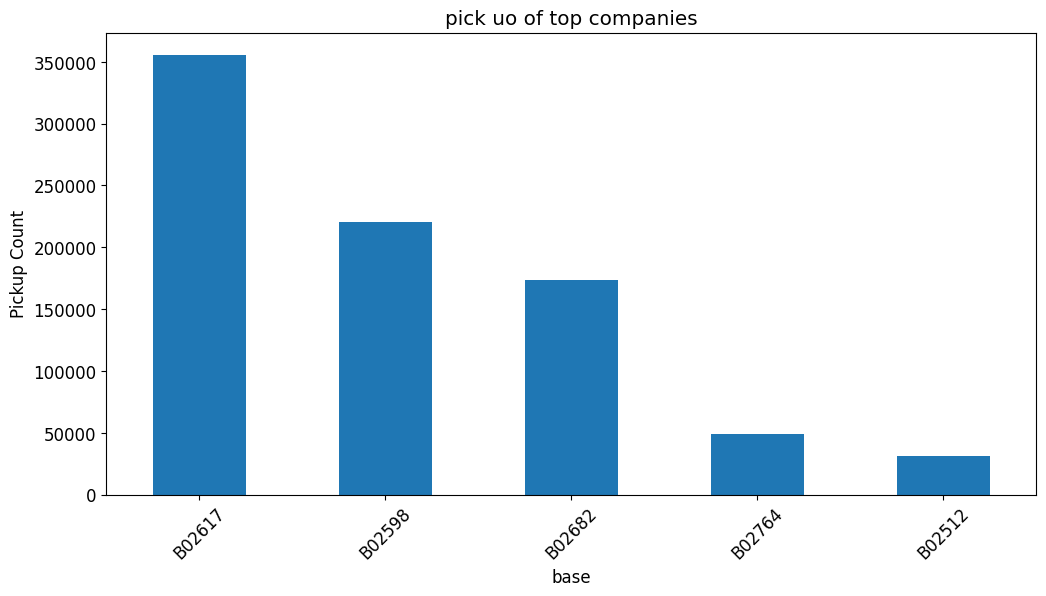

In [24]:
# Create a bar chart to compare the number of Uber pickups for each TLC base company

sorted_pickup_counts = pickup_counts.sort_values(ascending=False)
top_companies = sorted_pickup_counts.head()
print(top_companies)

plt.figure(figsize=(12, 6))
top_companies.plot(kind='bar')
plt.title('pick uo of top companies')
plt.xlabel('base')
plt.ylabel('Pickup Count')
plt.xticks(rotation=45)
plt.show()

#### Q10. Can you create a pie chart to display the percentage distribution of Uber pickups for each day of the week?

**Skill Test:** Pie Chart

In [25]:
# Group by day of the week and count the number of pickups

df['DayOfWeek'] = df['Date/Time'].dt.dayofweek
pickup_counts_by_day = df['DayOfWeek'].value_counts()
pickup_percentages = pickup_counts_by_day / pickup_counts_by_day.sum() * 100

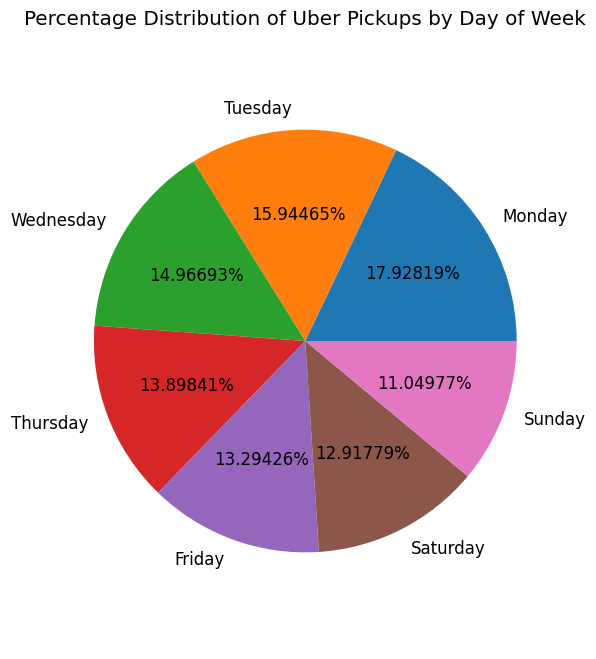

In [27]:
# Create a pie chart to display the percentage distribution of Uber pickups for each day of the week

labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(6,8))
plt.pie(pickup_percentages, labels=labels, autopct='%1.5f%%')
plt.title('Percentage Distribution of Uber Pickups by Day of Week')
plt.axis('equal')
plt.show()